## Task # 2 - To Explore
##  Supervised Machine Learning


### Objective : To predict the percentage of marks that a student is expected ro score based on the number of hours they studied

### Approach : I'm going to use Simple Linear Regression as the data contains only 2 variables


## Importing required Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load dataset from -  http://bit.ly/w-data

In [3]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**There are no null values**

In [9]:
df.values

array([[ 2.5, 21. ],
       [ 5.1, 47. ],
       [ 3.2, 27. ],
       [ 8.5, 75. ],
       [ 3.5, 30. ],
       [ 1.5, 20. ],
       [ 9.2, 88. ],
       [ 5.5, 60. ],
       [ 8.3, 81. ],
       [ 2.7, 25. ],
       [ 7.7, 85. ],
       [ 5.9, 62. ],
       [ 4.5, 41. ],
       [ 3.3, 42. ],
       [ 1.1, 17. ],
       [ 8.9, 95. ],
       [ 2.5, 30. ],
       [ 1.9, 24. ],
       [ 6.1, 67. ],
       [ 7.4, 69. ],
       [ 2.7, 30. ],
       [ 4.8, 54. ],
       [ 3.8, 35. ],
       [ 6.9, 76. ],
       [ 7.8, 86. ]])

## Data Visualization using matplotlib

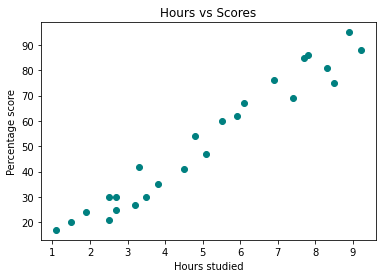

In [4]:
plt.scatter(df.Hours,df.Scores,color='teal')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()


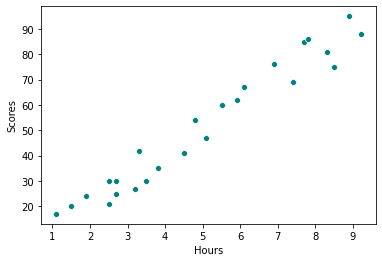

In [8]:
sns.scatterplot(df.Hours,df.Scores,color='teal')

##  Preparing the data to divide into "features" and "target"


In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [12]:
X= X.reshape(-1, 1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
Y=y.reshape(-1,1)
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

## Perform train-test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

##  Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [16]:
lr.fit(X_train,Y_train)

LinearRegression()

In [17]:
y_pred=lr.predict(X_test)

In [18]:
y_pred

array([[15.9477618 ],
       [32.77394723],
       [74.344523  ],
       [25.84551793],
       [59.49788879],
       [38.71260091],
       [19.90686425],
       [78.30362545],
       [69.39564493],
       [11.98865934]])

In [19]:
pd.DataFrame(np.c_[X_test, Y_test, y_pred] , columns= ['Hours' , 'Given Scores', 'Predicted Scores'])

,Hours,Given Scores,Predicted Scores
0,1.5,20.0,15.947762
1,3.2,27.0,32.773947
2,7.4,69.0,74.344523
3,2.5,30.0,25.845518
4,5.9,62.0,59.497889
5,3.8,35.0,38.712601
6,1.9,24.0,19.906864
7,7.8,86.0,78.303625
8,6.9,76.0,69.395645
9,1.1,17.0,11.988659


## Accuracy using Linear Regressor

In [20]:
accuracy_lr=lr.score(X_test,Y_test)
accuracy_lr

0.956640847232559

In [21]:
print(accuracy_lr*100,'%')

95.66408472325591 %


##    Plotting the regression line


In [22]:
line=lr.coef_*X+lr.intercept_

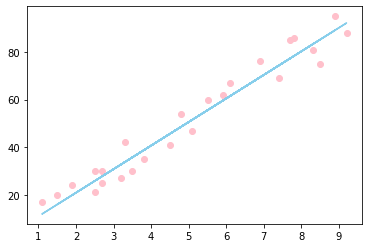

In [23]:
plt.scatter(X,Y,color='pink')
plt.plot(X,line,color='skyblue')
plt.show()

## Predicting score if a student study for 9.25 hrs in a day  by Linear regression model

In [24]:
hrs=9.25
hours=[[hrs]]
pred=lr.predict(hours)


In [25]:
pred

array([[92.65537185]])

In [26]:
print("NO of Hours={}".format(hrs))
print("Predicted Score={}".format(pred[0]))

NO of Hours=9.25
Predicted Score=[92.65537185]


## Evaluating the model


In [27]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_test,y_pred))
print('MsE:',metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))


MAE: 4.894510863410609
MsE: 26.034569687682243
RMSE: 5.102408224327238


## Inferences :

* Accracy of the dataset using  Linear regression model is 95.66%

* According to Linear regression score of a student if he study for 9.25 hrs in a day  is 92.65